<a href="https://colab.research.google.com/github/LuciferX45/WhatsApp-Chat-Analysis-Using-NLP/blob/main/NLP_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **WhatsApp Chat EDA and Sentiment Analysis**
By Gautam Padhi(I034)

B2, SEM V, BTech AI

  * Step 1: Detecting {Date} and {Time} tokens
  * Step 2: Detecting the {Author} token
  * Step 3: Extracting and Combining tokens
  * Step 4: Parsing the entire file and handling Multi-Line Messages
  * Step 5: Performing EDA for analyzing chat data
  * Step 6: Overall statistics of WhatsApp chat including Total number of messages, media messages(Omitted) & total number of URLs
  * Step 7: Extracting basic statistics for each Author (user)
  * Step 8: Word cloud of each Author(user)
  * Step 9: Word cloud of most used words in chat
  * Step 10: Total number of messages sent by each user
  * Step 11: Total messages sent on each day of the week
  * Step 12: Most active author of the chat
  * Step 13: Most active day in a week
  * Step 14: Calendar Map
  * Step 15: Sentiment Ananlysis on the data

In [ ]:
!pip install emoji
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install tldextract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install urlextract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import all necessary libraries

In [ ]:
import re
import regex
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from urlextract import URLExtract
from wordcloud import WordCloud
from matplotlib.ticker import MaxNLocator
from plotly import express as px
import seaborn as sns
from datetime import *
import datetime as dt

In [ ]:
file = open("/content/_chat.txt" , 'r', encoding='utf-8')
data = file.read()
print(data)

[05/08/22, 10:18:04 AM] Placement Training Prog. : ‎Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.
[05/08/22, 10:18:04 AM] ‎‪+91 86574 30710‬ created this group
[05/08/22, 10:44:56 AM] ‎You joined using this group's invite link
[05/08/22, 10:46:31 AM] ‎Shounak joined using this group's invite link
[05/08/22, 10:52:45 AM] ‎‪+91 85306 75757‬ joined using this group's invite link
[05/08/22, 11:08:26 AM] ‎‪+91 89289 66341‬ joined using this group's invite link
[05/08/22, 11:49:35 AM] ‪+91 96190 75643‬: Why is there offline placement on Sunday when a test is also scheduled
[05/08/22, 11:52:25 AM] Shrushti: why is there offline placement 😭
[05/08/22, 11:54:08 AM] ‎Shaunak joined using this group's invite link
[05/08/22, 11:54:25 AM] ‎‪+91 70213 42066‬ joined using this group's invite link
[05/08/22, 12:00:14 PM] ‎Aryan Malviya joined using this group's invite link
[05/08/22, 12:04:03 PM] ‎‪+91 77388 20977‬ joined using

##Data Pre-processing

In [ ]:
#spliting the data into dates and messages 
pattern= '\[[^\]]*\]'

messages = re.split(pattern , data)
print("messages :" , messages)

dates = re.findall(pattern  ,data)
print("dates : ", dates)

messages : ['', ' Placement Training Prog. : \u200eMessages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.\n', ' \u200e\u202a+91\xa086574\xa030710\u202c created this group\n', " \u200eYou joined using this group's invite link\n", " \u200eShounak joined using this group's invite link\n", " \u200e\u202a+91\xa085306\xa075757\u202c joined using this group's invite link\n", " \u200e\u202a+91\xa089289\xa066341\u202c joined using this group's invite link\n", ' \u202a+91\xa096190\xa075643\u202c: Why is there offline placement on Sunday when a test is also scheduled\n', ' Shrushti: why is there offline placement 😭\n', " \u200eShaunak joined using this group's invite link\n", " \u200e\u202a+91\xa070213\xa042066\u202c joined using this group's invite link\n", " \u200eAryan Malviya joined using this group's invite link\n", " \u200e\u202a+91\xa077388\xa020977\u202c joined using this group's invite link\n", " \u202a+91\xa086574\xa03071

In [ ]:
# removing square brackets form the string date
date=[]
for i in range(-1,len(dates)):
  x = dates[i][1:]
  x = x[:-1]
  date.append(x)

date[0]

'06/11/22, 6:44:48 PM'

In [ ]:
# now in dates there are some dirty data 
#removing dirty data 
dates_index = []
for i in date:
  if not(len(i)>=19 and len(i)<=21):
    x = date.index(i)
    dates_index.append(x)
    del date[x]
    del messages[x]

print(len(date))
print(len(messages))
print(dates_index)

365
365
[]


In [ ]:
#converting list of message and dates into datasets
df = pd.DataFrame({ 'date': date ,'user_message': messages})
# convert date type
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%y, %H:%M:%S %p')

In [ ]:
df.head()

,date,user_message
0,2022-11-06 06:44:48,
1,2022-08-05 10:18:04,Placement Training Prog. : ‎Messages and call...
2,2022-08-05 10:18:04,‎‪+91 86574 30710‬ created this group\n
3,2022-08-05 10:44:56,‎You joined using this group's invite link\n
4,2022-08-05 10:46:31,‎Shounak joined using this group's invite link\n


In [ ]:
users = []
messages = []
for message in df['user_message']:
  entry = re.split('([\w\W]+?):\s', message)
  if entry[1:]:  # user name
    users.append(entry[1])
    messages.append(" ".join(entry[2:]))
  else:
    users.append('group_notification')
    messages.append(entry[0])

In [ ]:
# making dataset more presice 
df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)
df['only_date'] = df['date'].dt.date
df['year'] = df['date'].dt.year
df['month_num'] = df['date'].dt.month
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['day_name'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df['second'] = df['date'].dt.second

In [ ]:
df

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute,second
0,2022-11-06 06:44:48,group_notification,,2022-11-06,2022,11,November,6,Sunday,6,44,48
1,2022-08-05 10:18:04,Placement Training Prog.,‎Messages and calls are end-to-end encrypted. ...,2022-08-05,2022,8,August,5,Friday,10,18,4
2,2022-08-05 10:18:04,group_notification,‎‪+91 86574 30710‬ created this group\n,2022-08-05,2022,8,August,5,Friday,10,18,4
3,2022-08-05 10:44:56,group_notification,‎You joined using this group's invite link\n,2022-08-05,2022,8,August,5,Friday,10,44,56
4,2022-08-05 10:46:31,group_notification,‎Shounak joined using this group's invite link\n,2022-08-05,2022,8,August,5,Friday,10,46,31
...,...,...,...,...,...,...,...,...,...,...,...,...
360,2022-11-05 02:31:11,‪+91 86574 30710‬,‎image omitted\n,2022-11-05,2022,11,November,5,Saturday,2,31,11
361,2022-11-05 02:31:38,‪+91 86574 30710‬,6th November... Tomorrow... See you all there ...,2022-11-05,2022,11,November,5,Saturday,2,31,38
362,2022-11-05 02:35:43,‪+91 99307 70575‬,.......\n,2022-11-05,2022,11,November,5,Saturday,2,35,43
363,2022-11-06 06:44:23,‪+91 86574 30710‬,Tomorrow NO Placement lecture from 10-12 !!!\n‎,2022-11-06,2022,11,November,6,Sunday,6,44,23


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       365 non-null    datetime64[ns]
 1   user       365 non-null    object        
 2   message    365 non-null    object        
 3   only_date  365 non-null    object        
 4   year       365 non-null    int64         
 5   month_num  365 non-null    int64         
 6   month      365 non-null    object        
 7   day        365 non-null    int64         
 8   day_name   365 non-null    object        
 9   hour       365 non-null    int64         
 10  minute     365 non-null    int64         
 11  second     365 non-null    int64         
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 34.3+ KB


In [ ]:
#----- Authors in the chat
df.user.unique()

array(['group_notification', ' Placement Training Prog. ',
       ' \u202a+91\xa096190\xa075643\u202c', ' Shrushti',
       ' \u202a+91\xa086574\xa030710\u202c',
       ' \u202a+91\xa070213\xa042066\u202c',
       ' \u202a+91\xa088280\xa047844\u202c',
       ' \u202a+91\xa099307\xa070575\u202c', ' Diya', ' Encyclopedia',
       ' Prisha', ' Soham', ' \u202a+91\xa087795\xa080336\u202c',
       ' \u202a+91\xa099205\xa088814\u202c', ' Shireen',
       ' \u202a+91\xa089289\xa066341\u202c', ' Sahil Patki', ' Brshank',
       ' Shounak', ' \u202a+91\xa090043\xa025265\u202c',
       ' \u202a+91\xa077388\xa020977\u202c', ' Aryan Malviya',
       ' \u202a+91\xa093262\xa088307\u202c', ' Shaunak',
       ' \u202a+91\xa099673\xa070593\u202c',
       ' \u202a+91\xa077382\xa096515\u202c'], dtype=object)

In [ ]:
#------ Displaying total number of messeges in the chat
total_messages = df.shape[0]
print(total_messages)

365


In [ ]:
#----- Displaying omitted media while exporting
media_messages = df[df["message"]=='<Media omitted>'].shape[0]
print(media_messages)

0


# ***Exploratory Data Analysis(EDA)***

# Step 5: Performing EDA for analyzing chat data

In [ ]:
### ----------- Checking shape of dataset.
df.shape

### ---------- Checking basic information of dataset
df.info()

### ----------  Checking no. of null values in dataset
df.isnull().sum()

### ---------- Checking head part of dataset
df.head(20)

### -------- Checking tail part of dataset
df.tail(20)

### -------- Droping Nan values from dataset
df = df.dropna()
df = df.reset_index(drop=True)
df.shape

### --------- Checking no. of authors of group
df['user'].nunique()

### --------- Checking authors of group
df['user'].unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       365 non-null    datetime64[ns]
 1   user       365 non-null    object        
 2   message    365 non-null    object        
 3   only_date  365 non-null    object        
 4   year       365 non-null    int64         
 5   month_num  365 non-null    int64         
 6   month      365 non-null    object        
 7   day        365 non-null    int64         
 8   day_name   365 non-null    object        
 9   hour       365 non-null    int64         
 10  minute     365 non-null    int64         
 11  second     365 non-null    int64         
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 34.3+ KB


array(['group_notification', ' Placement Training Prog. ',
       ' \u202a+91\xa096190\xa075643\u202c', ' Shrushti',
       ' \u202a+91\xa086574\xa030710\u202c',
       ' \u202a+91\xa070213\xa042066\u202c',
       ' \u202a+91\xa088280\xa047844\u202c',
       ' \u202a+91\xa099307\xa070575\u202c', ' Diya', ' Encyclopedia',
       ' Prisha', ' Soham', ' \u202a+91\xa087795\xa080336\u202c',
       ' \u202a+91\xa099205\xa088814\u202c', ' Shireen',
       ' \u202a+91\xa089289\xa066341\u202c', ' Sahil Patki', ' Brshank',
       ' Shounak', ' \u202a+91\xa090043\xa025265\u202c',
       ' \u202a+91\xa077388\xa020977\u202c', ' Aryan Malviya',
       ' \u202a+91\xa093262\xa088307\u202c', ' Shaunak',
       ' \u202a+91\xa099673\xa070593\u202c',
       ' \u202a+91\xa077382\xa096515\u202c'], dtype=object)

In [ ]:
###--------  Adding one more column of "Day" for better analysis, here we use datetime library which help us to do this task easily.
weeks = {0 : 'Monday', 1 : 'Tuesday',2 : 'Wednesday',
         3 : 'Thrusday', 4 : 'Friday', 5 : 'Saturday',
         6 : 'Sunday'}

df['day'] = df['date'].dt.weekday.map(weeks)

### ----------- Rearranging the columns for better understanding
df = df[['date','day','hour','minute','second','user','message']]

### ----------- Changing the datatype of column "Day".
df['day'] = df['day'].astype('category')

### ---------- Looking newborn dataset.
df.head()

### ---------- Counting number of letters in each message
df['Letter'] = df['message'].apply(lambda s : len(s))

### ---------- Counting number of word's in each message
df['Word'] = df['message'].apply(lambda s : len(s.split(' ')))

### ---------- Function to count number of links in dataset, it will add extra column and store information in it.
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

###--------- Function to count number of media in chat.
MEDIAPATTERN = r'<Media omitted>'
df['Media_Count'] = df.message.apply(lambda x : regex.findall(MEDIAPATTERN, x)).str.len()
media = np.sum(df.Media_Count)
###------- Looking into updated dataset
df

,date,day,hour,minute,second,user,message,Letter,Word,urlcount,Media_Count
0,2022-11-06 06:44:48,Sunday,6,44,48,group_notification,,0,1,0,0
1,2022-08-05 10:18:04,Friday,10,18,4,Placement Training Prog.,‎Messages and calls are end-to-end encrypted. ...,122,21,0,0
2,2022-08-05 10:18:04,Friday,10,18,4,group_notification,‎‪+91 86574 30710‬ created this group\n,39,5,0,0
3,2022-08-05 10:44:56,Friday,10,44,56,group_notification,‎You joined using this group's invite link\n,44,8,0,0
4,2022-08-05 10:46:31,Friday,10,46,31,group_notification,‎Shounak joined using this group's invite link\n,48,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...
360,2022-11-05 02:31:11,Saturday,2,31,11,‪+91 86574 30710‬,‎image omitted\n,15,2,0,0
361,2022-11-05 02:31:38,Saturday,2,31,38,‪+91 86574 30710‬,6th November... Tomorrow... See you all there ...,58,10,0,0
362,2022-11-05 02:35:43,Saturday,2,35,43,‪+91 99307 70575‬,.......\n,8,1,0,0
363,2022-11-06 06:44:23,Sunday,6,44,23,‪+91 86574 30710‬,Tomorrow NO Placement lecture from 10-12 !!!\n‎,46,7,0,0


# Step 6: Overall statistics of WhatsApp chat including Total number of messages, media messages(Omitted) & Total number of URLs

In [ ]:
total_messages = df.shape[0]
media_messages = df[df['message'] == '<Media omitted>'].shape[0]
links = np.sum(df.urlcount)
print('Personal Chat Stats : ')
print('Total Number of Messages : {}'.format(total_messages))
print('Total Number of Media Messages : {}'.format(media_messages))
print('Total Number of Links : {}'.format(links))

Personal Chat Stats : 
Total Number of Messages : 365
Total Number of Media Messages : 0
Total Number of Links : 4


# Step 7: Extracting basic statistics for each Author (user)

In [ ]:
l = df.user.unique()
for i in range(len(l)):
  ### -------Filtering out messages of particular user
  req_df = df[df["user"] == l[i]]

  ### -------- req_df will contain messages of only one particular user
  print(f'--> Stats of {l[i]} <-- ')

  ### -------- shape will print number of rows which indirectly means the number of messages
  print('Total Message Sent : ', req_df.shape[0])

  ### -------- Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word']))/req_df.shape[0]
  w_p_m = ("%.3f" % round(words_per_message, 2))  
  print('Average Words per Message : ', w_p_m)

  ### -------- media conists of media messages
  media = sum(req_df["Media_Count"])
  print('Total Media Message Sent : ', media)

  ### ------- links consist of total links
  links = sum(req_df["urlcount"])   
  print('Total Links Sent : ', links)   
  print()
  print('----------------------------------------------------------n')

--> Stats of group_notification <-- 
Total Message Sent :  21
Average Words per Message :  7.710
Total Media Message Sent :  0
Total Links Sent :  0

----------------------------------------------------------n
--> Stats of  Placement Training Prog.  <-- 
Total Message Sent :  1
Average Words per Message :  21.000
Total Media Message Sent :  0
Total Links Sent :  0

----------------------------------------------------------n
--> Stats of  ‪+91 96190 75643‬ <-- 
Total Message Sent :  8
Average Words per Message :  4.250
Total Media Message Sent :  0
Total Links Sent :  0

----------------------------------------------------------n
--> Stats of  Shrushti <-- 
Total Message Sent :  1
Average Words per Message :  6.000
Total Media Message Sent :  0
Total Links Sent :  0

----------------------------------------------------------n
--> Stats of  ‪+91 86574 30710‬ <-- 
Total Message Sent :  124
Average Words per Message :  7.150
Total Media Message Sent :  0
Total Links Sent :  3

------------

In [ ]:
def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X',text)

    for word in data:
        emojis = emoji.distinct_emoji_list(word)
        if any(char in emojis for char in word):
            emoji_list.append(word)
    return emoji_list
df['emoji'] = df["message"].apply(split_count)

emojis = sum(df['emoji'].str.len())
print(emojis)

62


In [ ]:
df.emoji


0      []
1      []
2      []
3      []
4      []
       ..
360    []
361    []
362    []
363    []
364    []
Name: emoji, Length: 365, dtype: object

# Step 8: Word cloud of most used words in chat

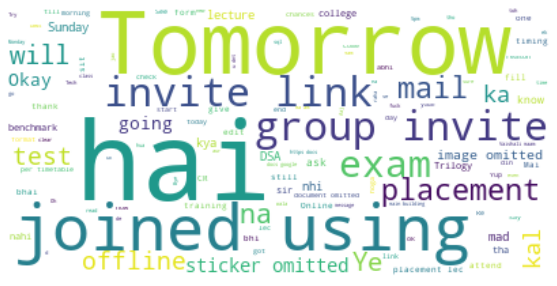

In [ ]:
### ------ Word Cloud of mostly used word in our Group
text = " ".join(review for review in df.message)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)

### ------ Display the generated image:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Step 9: Total number of messages sent by each user

In [ ]:
###------ Creates a list of unique Authors
l = df.user.unique()

for i in range(len(l)):
  ###------ Filtering out messages of particular user
  req_df = df[df["user"] == l[i]]

  ###------ req_df will contain messages of only one particular user
  print(l[i],'  ->  ',req_df.shape[0])

group_notification   ->   21
 Placement Training Prog.    ->   1
 ‪+91 96190 75643‬   ->   8
 Shrushti   ->   1
 ‪+91 86574 30710‬   ->   124
 ‪+91 70213 42066‬   ->   22
 ‪+91 88280 47844‬   ->   3
 ‪+91 99307 70575‬   ->   45
 Diya   ->   13
 Encyclopedia   ->   5
 Prisha   ->   10
 Soham   ->   27
 ‪+91 87795 80336‬   ->   4
 ‪+91 99205 88814‬   ->   4
 Shireen   ->   5
 ‪+91 89289 66341‬   ->   6
 Sahil Patki   ->   12
 Brshank   ->   12
 Shounak   ->   16
 ‪+91 90043 25265‬   ->   11
 ‪+91 77388 20977‬   ->   1
 Aryan Malviya   ->   4
 ‪+91 93262 88307‬   ->   3
 Shaunak   ->   2
 ‪+91 99673 70593‬   ->   3
 ‪+91 77382 96515‬   ->   2


# Step 10: Total messages sent on each day of the week

In [ ]:
l = df.day.unique()
for i in range(len(l)):
  ### ------ Filtering out messages of particular user
  req_df = df[df["day"] == l[i]]

  ###------- req_df will contain messages of only one particular user
  print(l[i],'  ->  ',req_df.shape[0])

Sunday   ->   48
Friday   ->   95
Saturday   ->   117
Monday   ->   50
Wednesday   ->   1
Thrusday   ->   53
Tuesday   ->   1


# Step 11: Most active author of the chat

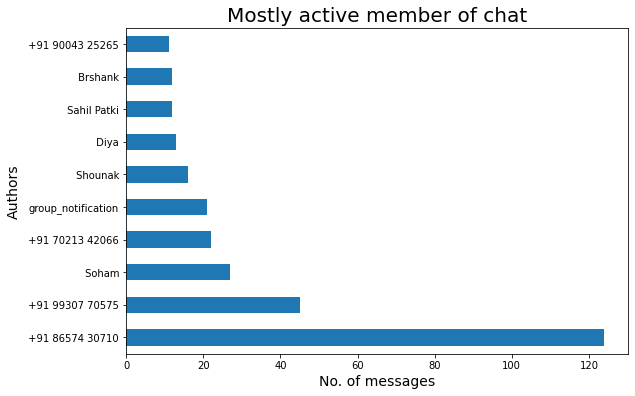

In [ ]:
### ------ Most Active Author in the chat
plt.figure(figsize=(9,6))
author_value_counts = df['user'].value_counts() #--- Number of messages per author
most_active = author_value_counts.head(10) #--- Number of messages per author for the  most active author
most_active.plot.barh() #--- Plot a bar chart using pandas built-in plotting apis

plt.xlabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('Authors',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Mostly active member of chat',fontdict={'fontsize': 20,'fontweight': 8})
plt.show()


# Step 12: Most active day in a week

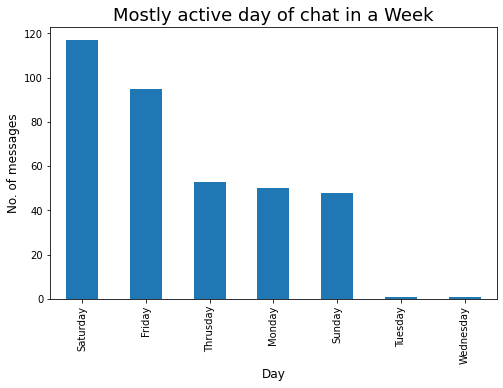

In [ ]:
### ------ Mostly Active day in the chat
plt.figure(figsize=(8,5))
active_day = df['day'].value_counts()

### ------ Most active author in the chat is : 
a_d = active_day.head(10)
a_d.plot.bar()
plt.xlabel('Day',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Mostly active day of chat in a Week',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

# Step 13: Most active day in a week

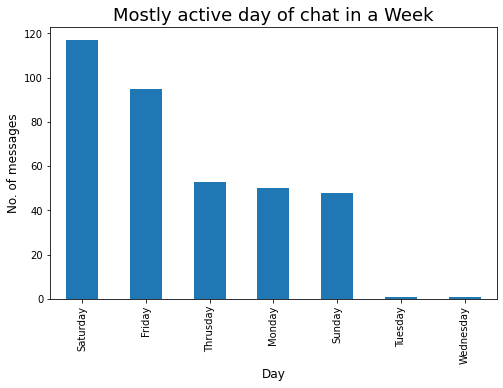

In [ ]:
#Mostly Active day in the chat
plt.figure(figsize=(8,5))
active_day = df['day'].value_counts()

#Most active author in the chat is : 
a_d = active_day.head(10)
a_d.plot.bar()
plt.xlabel('Day',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Mostly active day of chat in a Week',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

In [ ]:
!pip install calmap
import calmap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Step 14: Calendar Map

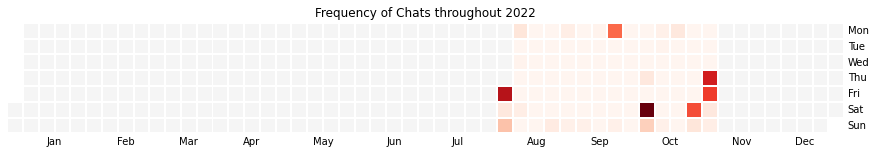

In [ ]:
np.random.seed(sum(map(ord, 'calmap')))
all_days = pd.date_range('1/1/2020', periods=365, freq='D')
days = np.array(df["date"])
events = pd.Series(len(days),index = days)
plt.figure(figsize=(15,10))
plt.title("Frequency of Chats throughout 2022")
calmap.yearplot(events, year=2022)

##Step 15: Performing Sentiment Analysis on the same chat

In [ ]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
df['polarity'] = df['message'].apply(lambda x: analyzer.polarity_scores(x))
df.head()

,date,day,hour,minute,second,user,message,Letter,Word,urlcount,Media_Count,emoji,polarity
0,2022-11-06 06:44:48,Sunday,6,44,48,group_notification,,0,1,0,0,[],"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound..."
1,2022-08-05 10:18:04,Friday,10,18,4,Placement Training Prog.,‎Messages and calls are end-to-end encrypted. ...,122,21,0,0,[],"{'neg': 0.099, 'neu': 0.901, 'pos': 0.0, 'comp..."
2,2022-08-05 10:18:04,Friday,10,18,4,group_notification,‎‪+91 86574 30710‬ created this group\n,39,5,0,0,[],"{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp..."
3,2022-08-05 10:44:56,Friday,10,44,56,group_notification,‎You joined using this group's invite link\n,44,8,0,0,[],"{'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'comp..."
4,2022-08-05 10:46:31,Friday,10,46,31,group_notification,‎Shounak joined using this group's invite link\n,48,8,0,0,[],"{'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'comp..."


In [ ]:
df = pd.concat(
    [df.drop(['date', 'day', 'user', 'polarity'], axis=1), 
     df['polarity'].apply(pd.Series)], axis=1)
df.head(3)

,hour,minute,second,message,Letter,Word,urlcount,Media_Count,emoji,neg,neu,pos,compound
0,6,44,48,,0,1,0,0,[],0.000,0.000,0.000,0.000
1,10,18,4,‎Messages and calls are end-to-end encrypted. ...,122,21,0,0,[],0.099,0.901,0.000,-0.296
2,10,18,4,‎‪+91 86574 30710‬ created this group\n,39,5,0,0,[],0.000,0.714,0.286,0.250


In [ ]:
df['sentiment'] = df['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
df.head(4)

,hour,minute,second,message,Letter,Word,urlcount,Media_Count,emoji,neg,neu,pos,compound,sentiment
0,6,44,48,,0,1,0,0,[],0.000,0.000,0.000,0.0000,neutral
1,10,18,4,‎Messages and calls are end-to-end encrypted. ...,122,21,0,0,[],0.099,0.901,0.000,-0.2960,negative
2,10,18,4,‎‪+91 86574 30710‬ created this group\n,39,5,0,0,[],0.000,0.714,0.286,0.2500,positive
3,10,44,56,‎You joined using this group's invite link\n,44,8,0,0,[],0.000,0.789,0.211,0.1531,positive


#Conclusion 
####In a rapidly evolving world as ours , data is being generated at a very fast pace . This data can either be structured or unstructured.Such data ranges from Big data to tweets made on Twitter, posts on Facebook and messages on WhatsApp. The availability of data has made it possible for data analysts and scientists to understand and gain deeper insight in human behaviour, observe trends, predict future events etc.

####In the above mini project, we have leveraged on this data availability and have worked with an interesting  whatsapp dataset easily found online. Using natural language processing , we made some interesting observations as elaborated in the code above.